In [194]:
import pandas as pd
import json
import plotly.express as ex

In [195]:
from google.cloud import bigquery

client = bigquery.Client()

In [196]:
client

In [197]:

# sql = """ 
# with route_unnest as
# (
# select
# x.appointment_id,
# name as route_name,
# number as route_number,
# vehicle_id
# from views.routes,
# unnest(appointments) x

# )


# select a.*, 
# (a.cnt_item_weight_under16 / a.sum_quantity) as ratio_item_weight_under16,
# (a.cnt_item_weight_over16 / a.sum_quantity) as ratio_item_weight_over16,
# case when ended_at is not null and arrived_at is null then 1 else 0 end as manager_override,
# --c.status_name,
# c.ownership_type_name,
# c.vehicle_size_name,
# c.fuel_type_name,
# c.capacity_cu_ft,
# route_name,
# route_number
# from views.appointments_ml a
# inner join route_unnest b
# on a.appointment_id = b.appointment_id
# inner join views.vehicles c
# on b.vehicle_id = c.id
# where type_name IN ('IKEA Delivery', 'Delivery') --and a.status_name = 'Completed'
# """

# test = client.query(sql).to_dataframe()
# test.head(500)

In [203]:


sql = """ 
with route_unnest as
(
select
x.appointment_id,
name as route_name,
number as route_number,
vehicle_id
from views.routes,
unnest(appointments) x

)--,

--appt_id as
--(
--select x as appointment_id
--from routing_automation_public.job_view,
--unnest(appointment_ids) x
--group by 1
--)


select a.*, 
(a.cnt_item_weight_under16 / a.sum_quantity) as ratio_item_weight_under16,
(a.cnt_item_weight_over16 / a.sum_quantity) as ratio_item_weight_over16,
case when ended_at is not null and arrived_at is null then 1 else 0 end as manager_override--,
--c.status_name,
--c.ownership_type_name,
--c.vehicle_size_name,
--c.fuel_type_name,
--c.capacity_cu_ft,
--route_name,
--route_number
from views.appointments_ml a
--inner join route_unnest b
--on a.appointment_id = b.appointment_id
--inner join views.vehicles c
--on b.vehicle_id = c.id
--inner join appt_id dd -- only automated jobs
--on dd.appointment_id= a.appointment_id

where type_name IN ('IKEA Delivery', 'Delivery') --and a.status_name = 'Completed'
"""

df2 = client.query(sql).to_dataframe()
df2.head()

,appointment_id,name,longitude,latitude,facility_longitude,facility_latitude,type_id,type_name,status_id,status_name,service_area_id,service_area_name,delivery_date,delivery_service_level_id,delivery_service_level_name,is_one_person_appointment,timeslot_id,timeslot_name,timeslot_starts_at,timeslot_ends_at,arrived_at,started_at,ended_at,canceled_at,incomplete_at,user_id,external_location_name,fulfillment_orders_id,facility_id,cnt_item_weight_under16,cnt_item_weight_over16,cnt_item_weight_16to30,cnt_item_weight_31to45,cnt_item_weight_46to60,cnt_item_weight_61to75,cnt_item_weight_76to90,cnt_item_weight_over90,cnt_item_fragile,cnt_item_dangerous,min_weight_lb,max_weight_lb,avg_weight_lb,sum_weight_lb,sum_quantity,facility_city,facility_country,facility_enabled,facility_name,facility_postal_code,facility_province,facility_service_area,facility_street,ratio_item_weight_under16,ratio_item_weight_over16,manager_override
0,0687cf4e-9a00-11ea-a3d7-ef181b030c03,A-OVCU2IU1,-79.269,43.692,NaN,NaN,7,Delivery,12,Completed,1.000,YYZ,2020-05-21,0,Standard,0,5.000,16:00 - 19:00,2020-05-21 20:00:00+00:00,2020-05-21 23:00:00+00:00,2020-05-21 18:15:15.646880+00:00,2020-05-21 18:15:16.823985+00:00,2020-05-21 18:15:21+00:00,NaT,NaT,66af4e06-1b2b-11e9-8caf-8b55e24405d3,None,c537deee-99ff-11ea-9c3d-23acd8d686f3,dd2bd7a4-0a9b-11ec-b03c-f71ee97507bc,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,110.00000000000000000000000000000000000000,110.00000000000000000000000000000000000000,110.00000000000000000000000000000000000000,110.00000000000000000000000000000000000000,1.000,Mississauga,Canada,False,YYZ2,L5T 2A4,ON,YYZ,2-7401 Pacific Circle,0.000,1.000,0
1,8231ab92-9b46-11e9-b173-0340de1af992,A-AY72G62P,-79.356,43.787,NaN,NaN,7,Delivery,1,Confirmed,1.000,YYZ,2019-07-02,0,Standard,0,5.000,16:00 - 19:00,2019-07-02 20:00:00+00:00,2019-07-02 23:00:00+00:00,NaT,NaT,NaT,NaT,NaT,66af4e06-1b2b-11e9-8caf-8b55e24405d3,None,7cec5608-99ea-11e9-a25a-8788a4a3867b,dd2bd7a4-0a9b-11ec-b03c-f71ee97507bc,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,92.00000000000000000000000000000000000000,92.00000000000000000000000000000000000000,92.00000000000000000000000000000000000000,92.00000000000000000000000000000000000000,1.000,Mississauga,Canada,False,YYZ2,L5T 2A4,ON,YYZ,2-7401 Pacific Circle,0.000,1.000,0
2,225539ae-3250-11ea-8957-3ba39018f92b,A-002F5LKS,-79.404,43.715,NaN,NaN,7,Delivery,12,Completed,1.000,YYZ,2020-01-14,0,Standard,0,4.000,13:00 - 16:00,2020-01-14 18:00:00+00:00,2020-01-14 21:00:00+00:00,2020-01-14 18:56:04.151035+00:00,2020-01-14 18:56:05.862119+00:00,2020-01-14 19:05:44+00:00,NaT,NaT,035dd4aa-aee5-11e9-87b1-0f5bbdc4dc63,None,18468224-3250-11ea-8957-1b88845ace8d,dd2bd7a4-0a9b-11ec-b03c-f71ee97507bc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,None,3.000,Mississauga,Canada,False,YYZ2,L5T 2A4,ON,YYZ,2-7401 Pacific Circle,0.000,0.000,0
3,eb893ccc-9b7c-11ea-87a8-97f1a421f5ec,A-LO132QJ5,-79.513,43.653,NaN,NaN,7,Delivery,12,Completed,1.000,YYZ,2020-05-25,0,Standard,0,4.000,13:00 - 16:00,2020-05-25 17:00:00+00:00,2020-05-25 20:00:00+00:00,2020-05-25 19:22:13.300020+00:00,2020-05-25 20:06:13.166256+00:00,2020-05-25 20:06:23+00:00,NaT,NaT,035dd4aa-aee5-11e9-87b1-0f5bbdc4dc63,None,e0b8bf48-9b7c-11ea-87a8-b38b701eddd2,dd2bd7a4-0a9b-11ec-b03c-f71ee97507bc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,None,3.000,Mississauga,Canada,False,YYZ2,L5T 2A4,ON,YYZ,2-7401 Pacific Circle,0.000,0.000,0
4,986169d8-57ee-11ea-b9d8-b3074405d4f0,A-QDV3VC0I,-79.418,43.670,NaN,NaN,7,Delivery,12,Completed,1.000,YYZ,2020-02-27,0,Standard,0,4.000,13:00 - 16:00,2020-02-27 18:00:00+00:00,2020-02-27 21:00:00+00:00,2020-02-27 19:31:22.949412+00:00,2020-02-27 19:31:25.362609+00:00,2020-02-27 20:12:48.323346+00:00,NaT,NaT,035dd4aa-aee5-11e9-87b1-0f5bbdc4dc63,None,8d36416e-57ee-11ea-b3a7-efcdb52d3240,dd2bd7a4-0a9b-11ec-b03c-f71ee97507bc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,None,7.000

# Exploratory data analysis

In [199]:
df2['type_name'].unique()

array(['IKEA Delivery'], dtype=object)

In [200]:
df2.groupby('type_name').size()

type_name
IKEA Delivery    4704
dtype: int64

In [201]:
df2['delivery_service_level_name'].unique()

array(['Standard', 'Standard (1-person)', 'To the Door (1-person)'],
      dtype=object)

In [202]:
df2['service_area_name'].unique()

array(['YYZ'], dtype=object)

In [109]:
# I mean, for each service_area_id, we noticed that sum_weight_lb.median() is too different. Duration as well. 
# Let's create model for each region separately for more accurate result
df2.groupby(['service_area_id'])['sum_weight_lb'].median()

service_area_id
1.000   157.680
2.000   121.275
3.000   170.160
4.000   169.020
Name: sum_weight_lb, dtype: float64

In [110]:
df2.groupby(['service_area_id']).size()

service_area_id
1.000    159518
2.000     76786
3.000     61775
4.000     59152
dtype: int64

In [111]:
def date_function(x,y):
    y[x +'_month'] = y[x +'_at'].dt.month
    y[x + '_day'] =y[x +'_at'].dt.day
    y[x +'_weekday'] =y[x +'_at'].dt.weekday
    y[x +'_hour'] =y[x +'_at'].dt.hour
    y[x +'_minute'] =y[x +'_at'].dt.minute

In [112]:
df2.loc[df2['manager_override'] == 1,'duration_sec'] = (df2['ended_at'][df2['manager_override'] == 1] - df2['started_at'][df2['manager_override'] == 1]).dt.total_seconds()
df2.loc[df2['manager_override'] == 0,'duration_sec'] = (df2['ended_at'][df2['manager_override'] == 0] - df2['arrived_at'][df2['manager_override'] == 0]).dt.total_seconds()

In [113]:
date_function('arrived',df2)

In [114]:
df2['delivery_date'] = pd.to_datetime(df2['delivery_date'])

In [115]:
# Difference b/w 1 and 3 is huge. This is why we will have to create separte model for each service_area_id.
df2.groupby(['service_area_id'])['duration_sec'].median()

service_area_id
1.000   319.598
2.000   380.111
3.000   369.397
4.000   330.717
Name: duration_sec, dtype: float64

In [116]:
df2.groupby(['status_name'])['duration_sec'].mean()

status_name
Arrived      -435567.674
Canceled         509.127
Completed       1766.114
Confirmed            NaN
Done            3461.036
Failed           994.400
Incomplete           NaN
Loaded               NaN
On the Way           NaN
Scheduled            NaN
Signed           642.388
Started              NaN
Name: duration_sec, dtype: float64

In [117]:
df2.groupby(['service_area_name','delivery_service_level_name'])['duration_sec'].mean()

service_area_name  delivery_service_level_name
YOW                Standard                       2726.581
                   Standard (1-person)            2409.884
                   To the Door (1-person)          391.027
                   White Glove                    1662.738
YUL                Standard                       2014.202
                   Standard (1-person)            3260.128
                   To the Door (1-person)          640.137
                   White Glove                   11432.791
YVR                Standard                       1294.173
                   Standard (1-person)            2007.125
                   To the Door (1-person)          376.478
                   White Glove                    3502.589
YYZ                Room of Choice                  817.382
                   Standard                       1620.278
                   Standard (1-person)            1218.849
                   To the Door                     295.856
         

In [118]:
df2.groupby(['service_area_name','delivery_service_level_name'])['duration_sec'].median()

service_area_name  delivery_service_level_name
YOW                Standard                       426.430
                   Standard (1-person)            310.291
                   To the Door (1-person)         191.536
                   White Glove                   1047.882
YUL                Standard                       332.862
                   Standard (1-person)            365.703
                   To the Door (1-person)         257.744
                   White Glove                    275.240
YVR                Standard                       405.030
                   Standard (1-person)            372.952
                   To the Door (1-person)         229.180
                   White Glove                    949.215
YYZ                Room of Choice                 548.455
                   Standard                       327.456
                   Standard (1-person)            308.843
                   To the Door                     62.335
                   To the

In [119]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2['duration_sec'][df2['delivery_service_level_name'].isin(['Standard','Standard (1-person)'])].describe()

count    313623.000
mean       1813.603
std       52914.765
min     -435567.674
25%         127.486
50%         355.213
75%         769.995
max     9159738.099
Name: duration_sec, dtype: float64

In [121]:
df2['duration_sec'].quantile(0.85)

1232.96424

In [122]:
df2['duration_sec'].quantile(0.9)

1905.0812472000011

In [123]:
# filter by last 90 days only 
#df2 = df2[df2['delivery_date'] > '2021-11-13'].reset_index(drop = True)

In [124]:
# only Ontario -- select YYZ and YOW separately for model
#df2 = df2[df2['service_area_name'].isin(['YYZ','YOW'])].reset_index(drop=True)
df2 = df2[df2['service_area_name'].isin(['YYZ'])].reset_index(drop=True)

In [125]:
df2['delivery_service_level_name'].unique()

array(['Standard', 'White Glove', 'To the Door', 'Standard (1-person)',
       'To the Door (1-person)', 'Room of Choice'], dtype=object)

In [126]:
# only standard deliveries
df2 = df2[df2['delivery_service_level_name'].isin(['Standard','Standard (1-person)'])].reset_index(drop=True)
#df2 = df2[df2['delivery_service_level_name'].isin(['White Glove'])].reset_index(drop=True)

In [127]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2.describe()

,longitude,latitude,facility_longitude,facility_latitude,service_area_id,is_one_person_appointment,timeslot_id,cnt_item_weight_under16,cnt_item_weight_over16,cnt_item_weight_16to30,...,sum_quantity,ratio_item_weight_under16,ratio_item_weight_over16,manager_override,duration_sec,arrived_month,arrived_day,arrived_weekday,arrived_hour,arrived_minute
count,150245.000,150245.000,149010.000,149010.000,150248.000,150248.000,150248.000,150243.000,150243.000,150243.000,...,150243.000,150243.000,150243.000,150248.000,141698.000,140418.000,140418.000,140418.000,140418.000,140418.000
mean,-79.668,43.575,-79.482,43.763,1.000,0.149,7.492,10.143,3.253,1.103,...,13.574,0.435,0.514,0.020,1560.706,6.509,15.674,2.938,17.146,28.511
std,0.515,0.216,0.202,0.026,0.000,0.356,3.309,41.252,4.584,2.757,...,42.843,0.370,0.375,0.138,55181.042,3.448,8.801,1.972,2.938,17.547
min,-122.032,34.990,-122.869,43.762,1.000,0.000,2.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,-435567.674,1.000,1.000,0.000,0.000,0.000
25%,-79.769,43.494,-79.468,43.762,1.000,0.000,4.000,0.000,1.000,0.000,...,2.000,0.000,0.167,0.000,97.391,4.000,8.000,1.000,15.000,13.000
50%,-79.497,43.640,-79.468,43.762,1.000,0.000,9.000,2.000,2.000,0.000,...,5.000,0.500,0.500,0.000,324.041,6.000,16.000,3.000,17.000,28.000
75%,-79.381,43.684,-79.468,43.762,1.000,0.000,10.000,9.000,4.000,1.000,...,13.000,0.800,1.000,0.000,709.771,9.000,23.000,5.000,19.000,44.000
max,2.352,48.857,-73.582,49.232,1.000,1.000,17.000,6277.000,247.000,110.000,...,6277.000,1.000,1.000,1.000,9159738.099,12.000,31.000,6.000,23.000,59.000


In [128]:
df2['duration_sec'].describe()

count    141698.000
mean       1560.706
std       55181.042
min     -435567.674
25%          97.391
50%         324.041
75%         709.771
max     9159738.099
Name: duration_sec, dtype: float64

In [131]:
# given that 85th percentile is 3750, let's do lower 120 and upper 4100 for YYZ
# but before doing this here, let's do manager_override = 0 and then get more accurate limit
df2['duration_sec'].quantile(0.9)

## 2022/02/23 (cut off at 90th percentile, not 95th for more optimized result)
## for white glove, do 5400 as upper limit and for standard, do 2000 as upper limit for IKEA in YYZ

1587.4712421000002

### visualization

In [132]:
## on tuesday, duration_sec is highest..
df2.groupby(['arrived_weekday'])['duration_sec'].mean()

arrived_weekday
0.000   1093.384
1.000   2466.775
2.000   1506.701
3.000   1075.467
4.000   1165.284
5.000   1522.353
6.000   2322.669
Name: duration_sec, dtype: float64

In [133]:
df2.groupby(['arrived_weekday'])['duration_sec'].median()

arrived_weekday
0.000   334.296
1.000   337.800
2.000   337.623
3.000   338.791
4.000   338.223
5.000   326.190
6.000   325.408
Name: duration_sec, dtype: float64

In [228]:
## by fuel_type_name, 
# df2.groupby(['fuel_type_name'])['duration_sec'].mean()

In [227]:
# plot = df2.groupby(['fuel_type_name'])[['duration_sec']].mean().reset_index()

In [226]:
# ex.bar(plot, x="fuel_type_name", y="duration_sec")

In [225]:
# df2.groupby('fuel_type_name').size()

In [224]:
# df2.groupby(['capacity_cu_ft'])['duration_sec'].mean()

In [223]:
# df2.groupby(['capacity_cu_ft']).size()

In [221]:
# df2.groupby(['route_number']).size()

In [222]:
# df2.groupby(['route_number'])['duration_sec'].mean()

In [142]:
## someone left appointment open and probably didn't close the app
## throw out maybe top 15 percentile and lowest 15 percentile
## Let's stick to 120 to top 15 percentile as a norm

In [143]:
df2['delivery_service_level_name'].unique()

array(['Standard', 'Standard (1-person)'], dtype=object)

In [144]:
df2.groupby('manager_override').size()

manager_override
0    147318
1      2930
dtype: int64

In [145]:
df_model = df2.copy()
del df2

In [146]:
df_model.loc[df_model['manager_override'] == 1,'duration_sec'] = (df_model['ended_at'][df_model['manager_override'] == 1] - df_model['started_at'][df_model['manager_override'] == 1]).dt.total_seconds()
df_model.loc[df_model['manager_override'] == 0,'duration_sec'] = (df_model['ended_at'][df_model['manager_override'] == 0] - df_model['arrived_at'][df_model['manager_override'] == 0]).dt.total_seconds()

In [147]:
df_model = df_model[~df_model['duration_sec'].isnull()].reset_index(drop=True)

In [148]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141698 entries, 0 to 141697
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   appointment_id               141698 non-null  object             
 1   name                         141698 non-null  object             
 2   longitude                    141695 non-null  float64            
 3   latitude                     141695 non-null  float64            
 4   facility_longitude           140577 non-null  float64            
 5   facility_latitude            140577 non-null  float64            
 6   type_id                      141698 non-null  object             
 7   type_name                    141698 non-null  object             
 8   status_id                    141698 non-null  object             
 9   status_name                  141675 non-null  object             
 10  service_area_id              141

In [149]:
#Get latitude and longitude differences 
df_model["latitude_difference"] = df_model["facility_latitude"] - df_model["latitude"]
df_model["longitude_difference"] = df_model["facility_longitude"] - df_model["longitude"]

In [150]:
import numpy as np
#Convert trip distance from longitude and latitude differences to Manhattan distance.
df_model["trip_distance"] = 0.621371 * 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(df_model["latitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(df_model["latitude_difference"]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(df_model["longitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(df_model["longitude_difference"]) * np.pi / 180) / 2)))))))

In [151]:
df_model['sum_weight_lb'] = df_model['sum_weight_lb'].astype('float')

In [152]:
#df_model.started_at.dt.year
df_model['started_month'] = df_model.started_at.dt.month
df_model['started_day'] =df_model.started_at.dt.day
df_model['started_weekday'] =df_model.started_at.dt.weekday
df_model['started_hour'] =df_model.started_at.dt.hour
df_model['started_minute'] =df_model.started_at.dt.minute

In [153]:
def date_function(x):
    df_model[x +'_month'] = df_model[x +'_at'].dt.month
    df_model[x + '_day'] =df_model[x +'_at'].dt.day
    df_model[x +'_weekday'] =df_model[x +'_at'].dt.weekday
    df_model[x +'_hour'] =df_model[x +'_at'].dt.hour
    df_model[x +'_minute'] =df_model[x +'_at'].dt.minute

In [154]:
date_function('arrived')

In [155]:
df_model[df_model['sum_weight_lb'].isnull()]['sum_quantity'].unique()

array([  2.,   6.,   1.,  nan,  10.,   8.,   4.,   7.,   5.,  20.,  11.,
         3.,  16.,   9.,  15.,  24., 234.,  12.,  13.,  23.,  14.,  22.,
        19.,  18.,  17.,  21.,  33.,  25.])

### histogram

<AxesSubplot:>

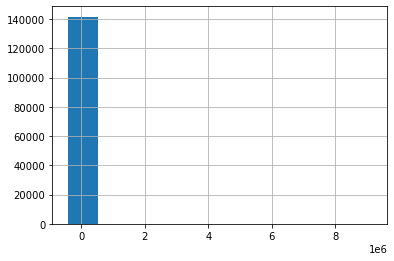

In [156]:
df_model['duration_sec'].hist()

### Data filtering

In [157]:
## for better data quality/modelling, let's just consider duration_sec <= 2000 as other observations might be outliers
df_model.describe()

,longitude,latitude,facility_longitude,facility_latitude,service_area_id,is_one_person_appointment,timeslot_id,cnt_item_weight_under16,cnt_item_weight_over16,cnt_item_weight_16to30,...,arrived_hour,arrived_minute,latitude_difference,longitude_difference,trip_distance,started_month,started_day,started_weekday,started_hour,started_minute
count,141695.000,141695.000,140577.000,140577.000,141698.000,141698.000,141698.000,141696.000,141696.000,141696.000,...,138768.000,138768.000,140576.000,140576.000,140576.000,141697.000,141697.000,141697.000,141697.000,141697.000
mean,-79.669,43.575,-79.482,43.763,1.000,0.148,7.467,10.048,3.240,1.094,...,17.146,28.512,0.189,0.189,37.225,6.506,15.676,2.928,17.184,28.183
std,0.457,0.214,0.048,0.005,0.000,0.355,3.307,34.790,4.528,2.705,...,2.934,17.545,0.214,0.466,34.531,3.444,8.807,1.973,3.145,17.593
min,-106.049,34.990,-79.645,43.762,1.000,0.000,2.000,0.000,0.000,0.000,...,0.000,0.000,-1.272,-2.984,0.067,1.000,1.000,0.000,0.000,0.000
25%,-79.770,43.494,-79.468,43.762,1.000,0.000,4.000,0.000,1.000,0.000,...,15.000,13.000,0.080,-0.101,12.834,4.000,8.000,1.000,15.000,13.000
50%,-79.499,43.640,-79.468,43.762,1.000,0.000,9.000,2.000,2.000,0.000,...,17.000,28.000,0.123,0.022,22.852,6.000,16.000,3.000,17.000,27.000
75%,-79.381,43.684,-79.468,43.762,1.000,0.000,10.000,9.000,4.000,1.000,...,19.000,44.000,0.269,0.296,58.208,9.000,23.000,5.000,19.000,43.000
max,-75.736,45.453,-75.611,45.385,1.000,1.000,17.000,2875.000,247.000,110.000,...,23.000,59.000,8.772,26.581,2442.635,12.000,31.000,6.000,23.000,59.000


In [158]:
## let's also take out overriden appointments & appointments that do not have sum_weight_lb
df_model = df_model[df_model['manager_override'] != 1]
df_model = df_model[~df_model['sum_weight_lb'].isnull()].reset_index(drop=True)

In [159]:
df_model['duration_sec'].describe()

count    131788.000
mean       1507.501
std       46461.800
min     -435567.674
25%         110.941
50%         332.334
75%         721.766
max     8013549.880
Name: duration_sec, dtype: float64

In [160]:
df_model.groupby('service_area_id').size()

service_area_id
1.000    131788
dtype: int64

In [161]:
df_model.groupby('service_area_id')['duration_sec'].median()

service_area_id
1.000   332.334
Name: duration_sec, dtype: float64

In [168]:
# Let's see 85th percentile again
df_model['duration_sec'].quantile(0.85)

1618.225749900001

In [169]:
# Let's use 4100 as a upper limit (let's do 3600) -- this is based on data sets that including ALL delivery types, not just IKEA

#### For IKEA
## Plan A. Let's try with 90th percentile and slightly above-- 2000?
## Plan B. For Ikea, we may do just 1200 in case 2000 doesn't work well
df_model = df_model[(df_model['duration_sec'] > 120) & (df_model['duration_sec'] < 2000)].reset_index(drop=True)
#df_model = df_model[(df_model['duration_sec'] > 120)].reset_index(drop=True)

In [170]:
df_model.describe()

,longitude,latitude,facility_longitude,facility_latitude,service_area_id,is_one_person_appointment,timeslot_id,cnt_item_weight_under16,cnt_item_weight_over16,cnt_item_weight_16to30,...,arrived_hour,arrived_minute,latitude_difference,longitude_difference,trip_distance,started_month,started_day,started_weekday,started_hour,started_minute
count,87267.000,87267.000,86748.000,86748.000,87267.000,87267.000,87267.000,87267.000,87267.000,87267.000,...,87267.000,87267.000,86748.000,86748.000,86748.000,87266.000,87266.000,87266.000,87266.000,87266.000
mean,-79.694,43.560,-79.476,43.762,1.000,0.165,7.822,10.618,3.429,1.148,...,16.983,29.122,0.203,0.219,39.698,6.632,15.639,2.871,16.998,28.946
std,0.487,0.221,0.038,0.006,0.000,0.371,3.255,34.678,4.396,2.672,...,2.844,17.543,0.221,0.492,36.812,3.429,8.798,1.948,2.853,17.552
min,-106.049,34.990,-79.645,43.762,1.000,0.000,3.000,0.000,0.000,0.000,...,0.000,0.000,-1.272,-2.515,0.067,1.000,1.000,0.000,0.000,0.000
25%,-79.859,43.472,-79.468,43.762,1.000,0.000,4.000,0.000,1.000,0.000,...,15.000,14.000,0.084,-0.095,12.842,4.000,8.000,1.000,15.000,13.000
50%,-79.506,43.636,-79.468,43.762,1.000,0.000,9.000,2.000,2.000,0.000,...,17.000,29.000,0.127,0.033,23.355,6.000,16.000,3.000,17.000,29.000
75%,-79.379,43.679,-79.468,43.762,1.000,0.000,10.000,10.000,4.000,1.000,...,19.000,44.000,0.290,0.392,67.160,10.000,23.000,4.000,19.000,44.000
max,-75.736,45.453,-75.611,45.385,1.000,1.000,17.000,2875.000,87.000,87.000,...,23.000,59.000,8.772,26.581,2442.635,12.000,31.000,6.000,23.000,59.000


In [171]:
df_model.corr()[df_model.corr() > 0.85]

,longitude,latitude,facility_longitude,facility_latitude,service_area_id,is_one_person_appointment,timeslot_id,cnt_item_weight_under16,cnt_item_weight_over16,cnt_item_weight_16to30,...,arrived_hour,arrived_minute,latitude_difference,longitude_difference,trip_distance,started_month,started_day,started_weekday,started_hour,started_minute
longitude,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
facility_longitude,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
facility_latitude,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service_area_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_one_person_appointment,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timeslot_id,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_item_weight_under16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_item_weight_over16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_item_weight_16to30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_model.columns

Index(['appointment_id', 'name', 'longitude', 'latitude', 'facility_longitude',
       'facility_latitude', 'type_id', 'type_name', 'status_id', 'status_name',
       'service_area_id', 'service_area_name', 'delivery_date',
       'delivery_service_level_id', 'delivery_service_level_name',
       'is_one_person_appointment', 'timeslot_id', 'timeslot_name',
       'timeslot_starts_at', 'timeslot_ends_at', 'arrived_at', 'started_at',
       'ended_at', 'canceled_at', 'incomplete_at', 'user_id',
       'external_location_name', 'fulfillment_orders_id', 'facility_id',
       'cnt_item_weight_under16', 'cnt_item_weight_over16',
       'cnt_item_weight_16to30', 'cnt_item_weight_31to45',
       'cnt_item_weight_46to60', 'cnt_item_weight_61to75',
       'cnt_item_weight_76to90', 'cnt_item_weight_over90', 'cnt_item_fragile',
       'cnt_item_dangerous', 'min_weight_lb', 'max_weight_lb', 'avg_weight_lb',
       'sum_weight_lb', 'sum_quantity', 'facility_city', 'facility_country',
       'facilit

In [173]:
df_model['sum_weight_lb'].describe()

count   87267.000
mean      238.821
std       249.493
min         0.080
25%       101.860
50%       166.010
75%       280.860
max     13181.100
Name: sum_weight_lb, dtype: float64

In [174]:
df_model['min_weight_lb'] = df_model['min_weight_lb'].astype('float')
df_model['max_weight_lb'] = df_model['max_weight_lb'].astype('float')
df_model['avg_weight_lb'] = df_model['avg_weight_lb'].astype('float')

In [175]:
df_model['service_area_id'] =  df_model['service_area_id'].astype('category')

In [176]:
# df_model['weight_over16_ratio'] = df_model['cnt_item_weight_over16'] / df_model['sum_quantity']
# df_model['weight_under16_ratio'] = df_model['cnt_item_weight_under16'] / df_model['sum_quantity']

In [177]:
df_model['cnt_item_fragile'].sum()

1933.0

In [178]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87267 entries, 0 to 87266
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   appointment_id               87267 non-null  object             
 1   name                         87267 non-null  object             
 2   longitude                    87267 non-null  float64            
 3   latitude                     87267 non-null  float64            
 4   facility_longitude           86748 non-null  float64            
 5   facility_latitude            86748 non-null  float64            
 6   type_id                      87267 non-null  object             
 7   type_name                    87267 non-null  object             
 8   status_id                    87267 non-null  object             
 9   status_name                  87262 non-null  object             
 10  service_area_id              87267 non-null  c

# Modeling

In [179]:
# we will also need something like started_hour, started_min, arrived_hour, arrived_min (also in month, day, weekday and etc) as variables for x
X = df_model[['sum_weight_lb', 
              'sum_quantity', 
              #'service_area_id', # depending on where you are delivering, duration might change
              'is_one_person_appointment',
              #'cnt_item_weight_under16', 'cnt_item_weight_16to30',
       #'cnt_item_weight_31to45', 'cnt_item_weight_46to60',
       #'cnt_item_weight_61to75', 'cnt_item_weight_76to90',
       #'cnt_item_weight_over90', 'cnt_item_fragile', 'cnt_item_dangerous',
       'min_weight_lb', 'max_weight_lb', 'avg_weight_lb',
              #'ratio_item_weight_over16', 'ratio_item_weight_under16',
              #'capacity_cu_ft', #'weight_lb/capacity_cu_ft',
              'arrived_month',
              #'arrived_day',
              
             'arrived_weekday'
             ]] #,
              #'arrived_hour',
              #'arrived_minute']] #,'trip_distance', 'latitude_difference', 'longitude_difference' ]]
#X = df_model[['sum_weight_lb']]
y = df_model["duration_sec"]

In [180]:
X['arrived_month'] = X['arrived_month'].astype('category')
#X['capacity_cu_ft'] = X['capacity_cu_ft'].astype('category')
#X['arrived_day'] = X['arrived_day'].astype('category')
X['arrived_weekday'] = X['arrived_weekday'].astype('category')
#X['arrived_hour'] = X['arrived_hour'].astype('category')
#X['arrived_minute'] = X['arrived_minute'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [181]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)

In [182]:
pd.concat([y,X],axis=1).corr()

,duration_sec,sum_weight_lb,sum_quantity,is_one_person_appointment,min_weight_lb,max_weight_lb,avg_weight_lb,arrived_month_5.0,arrived_month_8.0,arrived_month_2.0,...,arrived_month_9.0,arrived_month_10.0,arrived_month_4.0,arrived_weekday_2.0,arrived_weekday_3.0,arrived_weekday_5.0,arrived_weekday_4.0,arrived_weekday_0.0,arrived_weekday_6.0,arrived_weekday_1.0
duration_sec,1.000,0.319,0.186,-0.067,-0.087,0.101,-0.056,-0.040,0.026,0.026,...,0.011,0.003,-0.037,-0.007,-0.009,0.031,-0.004,-0.012,0.012,-0.008
sum_weight_lb,0.319,1.000,0.476,-0.183,-0.109,0.301,-0.021,-0.037,0.050,-0.004,...,0.017,0.026,-0.028,-0.009,-0.001,0.028,-0.002,-0.007,-0.006,-0.001
sum_quantity,0.186,0.476,1.000,-0.017,-0.183,-0.105,-0.241,-0.005,0.010,0.001,...,-0.003,0.013,-0.002,-0.001,0.003,0.014,-0.006,0.004,-0.009,-0.005
is_one_person_appointment,-0.067,-0.183,-0.017,1.000,-0.093,-0.272,-0.164,0.010,0.039,-0.045,...,0.058,0.064,0.030,-0.004,-0.000,-0.010,0.013,0.012,-0.008,-0.003
min_weight_lb,-0.087,-0.109,-0.183,-0.093,1.000,0.366,0.903,-0.053,0.008,-0.004,...,0.027,0.040,-0.043,0.005,-0.000,-0.009,0.003,0.003,-0.007,0.004
max_weight_lb,0.101,0.301,-0.105,-0.272,0.366,1.000,0.625,-0.048,0.052,-0.004,...,0.011,0.017,-0.038,-0.004,-0.004,0.010,0.000,-0.011,0.001,0.009
avg_weight_lb,-0.056,-0.021,-0.241,-0.164,0.903,0.625,1.000,-0.065,0.029,-0.005,...,0.029,0.041,-0.052,0.002,-0.002,-0.005,0.005,-0.001,-0.005,0.006
arrived_month_5.0,-0.040,-0.037,-0.005,0.010,-0.053,-0.048,-0.065,1.000,-0.117,-0.106,...,-0.114,-0.110,-0.130,-0.020,-0.019,0.039,-0.005,0.003,0.032,-0.024
arrived_month_8.0,0.026,0.050,0.010,0.039,0.008,0.052,0.029,-0.117,1.000,-0.082,...,-0.088,-0.085,-0.100,-0.011,-0.014,-0.007,-0.005,0.020,0.007,0.010
arrived_month_2.0,0.026,-0.004,0.001,-0.045,-0.004,-0.004,-0.005,-0.106,-0.082,1.000,...,-0.080,-0.076,-0.090,0.013,-0.001,0.005,-0.003,-0.019,-0.020,0.022


In [183]:
X.corr()

,sum_weight_lb,sum_quantity,is_one_person_appointment,min_weight_lb,max_weight_lb,avg_weight_lb,arrived_month_5.0,arrived_month_8.0,arrived_month_2.0,arrived_month_11.0,...,arrived_month_9.0,arrived_month_10.0,arrived_month_4.0,arrived_weekday_2.0,arrived_weekday_3.0,arrived_weekday_5.0,arrived_weekday_4.0,arrived_weekday_0.0,arrived_weekday_6.0,arrived_weekday_1.0
sum_weight_lb,1.000,0.476,-0.183,-0.109,0.301,-0.021,-0.037,0.050,-0.004,-0.001,...,0.017,0.026,-0.028,-0.009,-0.001,0.028,-0.002,-0.007,-0.006,-0.001
sum_quantity,0.476,1.000,-0.017,-0.183,-0.105,-0.241,-0.005,0.010,0.001,-0.005,...,-0.003,0.013,-0.002,-0.001,0.003,0.014,-0.006,0.004,-0.009,-0.005
is_one_person_appointment,-0.183,-0.017,1.000,-0.093,-0.272,-0.164,0.010,0.039,-0.045,-0.030,...,0.058,0.064,0.030,-0.004,-0.000,-0.010,0.013,0.012,-0.008,-0.003
min_weight_lb,-0.109,-0.183,-0.093,1.000,0.366,0.903,-0.053,0.008,-0.004,0.037,...,0.027,0.040,-0.043,0.005,-0.000,-0.009,0.003,0.003,-0.007,0.004
max_weight_lb,0.301,-0.105,-0.272,0.366,1.000,0.625,-0.048,0.052,-0.004,0.010,...,0.011,0.017,-0.038,-0.004,-0.004,0.010,0.000,-0.011,0.001,0.009
avg_weight_lb,-0.021,-0.241,-0.164,0.903,0.625,1.000,-0.065,0.029,-0.005,0.037,...,0.029,0.041,-0.052,0.002,-0.002,-0.005,0.005,-0.001,-0.005,0.006
arrived_month_5.0,-0.037,-0.005,0.010,-0.053,-0.048,-0.065,1.000,-0.117,-0.106,-0.117,...,-0.114,-0.110,-0.130,-0.020,-0.019,0.039,-0.005,0.003,0.032,-0.024
arrived_month_8.0,0.050,0.010,0.039,0.008,0.052,0.029,-0.117,1.000,-0.082,-0.090,...,-0.088,-0.085,-0.100,-0.011,-0.014,-0.007,-0.005,0.020,0.007,0.010
arrived_month_2.0,-0.004,0.001,-0.045,-0.004,-0.004,-0.005,-0.106,-0.082,1.000,-0.082,...,-0.080,-0.076,-0.090,0.013,-0.001,0.005,-0.003,-0.019,-0.020,0.022
arrived_month_11.0,-0.001,-0.005,-0.030,0.037,0.010,0.037,-0.117,-0.090,-0.082,1.000,...,-0.088,-0.085,-0.100,-0.020,-0.015,-0.007,-0.002,0.031,0.001,0.013


In [184]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87267 entries, 0 to 87266
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sum_weight_lb              87267 non-null  float64
 1   sum_quantity               87267 non-null  float64
 2   is_one_person_appointment  87267 non-null  int64  
 3   min_weight_lb              87267 non-null  float64
 4   max_weight_lb              87267 non-null  float64
 5   avg_weight_lb              87267 non-null  float64
 6   arrived_month_5.0          87267 non-null  int64  
 7   arrived_month_8.0          87267 non-null  int64  
 8   arrived_month_2.0          87267 non-null  int64  
 9   arrived_month_11.0         87267 non-null  int64  
 10  arrived_month_3.0          87267 non-null  int64  
 11  arrived_month_7.0          87267 non-null  int64  
 12  arrived_month_12.0         87267 non-null  int64  
 13  arrived_month_1.0          87267 non-null  int

In [185]:
import pandas as pd
import numpy as np
import xgboost as xgb

import pickle
#from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [186]:
#Split the data into training, test, and valdiation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

In [187]:
#XGBoost parameters  -- best parameters so far

## Do hyperparameter tuning to reduce RMSE on test set..
params = {
    'booster':            'gbtree',
    #'objective':          'reg:linear',
    'learning_rate':      0.02,
    'max_depth':          2,
    'subsample':          0.9,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1,
    'feval':              'rmse'
}

In [188]:
nrounds = 1500

In [189]:
#Define train and validation sets
dtrain = xgb.DMatrix(X_train, y_train)
dval = xgb.DMatrix(X_val, y_val)

#this is for tracking the error
watchlist = [(dval, 'eval'), (dtrain, 'train')]

In [190]:
y.mean()

559.2201239163303

In [191]:
y.median()

430.57803

In [192]:
np.sqrt(148046.2074)

384.76773175514603

### training model

In [193]:
#Train model
gbm = xgb.train(params,
                dtrain,
                num_boost_round = nrounds,
                evals = watchlist,
                verbose_eval = True
                )

[19:33:11] WARNING: ../src/learner.cc:576: 
Parameters: { "feval", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-rmse:680.05670	train-rmse:676.58374
[1]	eval-rmse:670.83923	train-rmse:667.39618
[2]	eval-rmse:661.76990	train-rmse:658.36163
[3]	eval-rmse:653.01111	train-rmse:649.61664
[4]	eval-rmse:644.76221	train-rmse:641.36902
[5]	eval-rmse:636.50220	train-rmse:633.15063
[6]	eval-rmse:628.49304	train-rmse:625.14496
[7]	eval-rmse:620.52850	train-rmse:617.20605
[8]	eval-rmse:613.13403	train-rmse:609.82208
[9]	eval-rmse:605.59357	train-rmse:602.30255
[10]	eval-rmse:598.40485	train-rmse:595.14374
[11]	eval-rmse:591.33765	train-rmse:588.11169
[12]	eval-rmse:584.41309	train-rmse:581.21570
[13]	eval-rmse:577.75806	train-rmse:574.57001


In [205]:
# save the model as pickle file
filename = "xgb_model.sav"
pickle.dump(gbm, open(filename, 'wb'))

## Prediction comparison

From routing automation job, we assume that each appointment would take 900 seconds no matter what.
Let's see if XGboost does better than this prediction.

* 1. Take difference between 'automation_prediction_value' and 'actual_value'
* 2. Take difference between 'xgboost_prediction_value' and 'actual_value'
* 3. Take the avg. of 1 & 2 and compare which one has lower avg.
* 4. For comparing 1 & 2, use train/test set separately

In [208]:
#Take a look at feature importance
feature_scores = gbm.get_fscore()
feature_scores

{'sum_weight_lb': 1021.0,
 'sum_quantity': 433.0,
 'is_one_person_appointment': 82.0,
 'min_weight_lb': 642.0,
 'max_weight_lb': 937.0,
 'avg_weight_lb': 492.0,
 'arrived_month_5.0': 105.0,
 'arrived_month_8.0': 39.0,
 'arrived_month_2.0': 60.0,
 'arrived_month_11.0': 52.0,
 'arrived_month_3.0': 4.0,
 'arrived_month_7.0': 12.0,
 'arrived_month_12.0': 58.0,
 'arrived_month_1.0': 35.0,
 'arrived_month_6.0': 27.0,
 'arrived_month_9.0': 38.0,
 'arrived_month_10.0': 32.0,
 'arrived_month_4.0': 104.0,
 'arrived_weekday_2.0': 32.0,
 'arrived_weekday_3.0': 17.0,
 'arrived_weekday_5.0': 105.0,
 'arrived_weekday_4.0': 29.0,
 'arrived_weekday_0.0': 23.0,
 'arrived_weekday_6.0': 82.0,
 'arrived_weekday_1.0': 7.0}

In [209]:
#This is not very telling, so let's scale the features
summ = 0
for key in feature_scores:
    summ = summ + feature_scores[key]

for key in feature_scores:
    feature_scores[key] = feature_scores[key] / summ

# weight and quantity are top 2 most important features when it comes to predicting duration_sec
feature_scores

{'sum_weight_lb': 0.22851387645478963,
 'sum_quantity': 0.09691136974037601,
 'is_one_person_appointment': 0.018352730528200537,
 'min_weight_lb': 0.14368845120859444,
 'max_weight_lb': 0.20971351835273053,
 'avg_weight_lb': 0.11011638316920322,
 'arrived_month_5.0': 0.023500447627573858,
 'arrived_month_8.0': 0.008728737690241718,
 'arrived_month_2.0': 0.01342882721575649,
 'arrived_month_11.0': 0.011638316920322292,
 'arrived_month_3.0': 0.0008952551477170994,
 'arrived_month_7.0': 0.0026857654431512983,
 'arrived_month_12.0': 0.012981199641897942,
 'arrived_month_1.0': 0.00783348254252462,
 'arrived_month_6.0': 0.006042972247090421,
 'arrived_month_9.0': 0.008504923903312443,
 'arrived_month_10.0': 0.007162041181736795,
 'arrived_month_4.0': 0.023276633840644583,
 'arrived_weekday_2.0': 0.007162041181736795,
 'arrived_weekday_3.0': 0.0038048343777976725,
 'arrived_weekday_5.0': 0.023500447627573858,
 'arrived_weekday_4.0': 0.006490599820948971,
 'arrived_weekday_0.0': 0.005147717099

In [210]:
# xgboost prediction (train)
prediction_label =pd.DataFrame(gbm.predict(dtrain))

In [211]:
## 900 seconds (train)
## create data frame for actual value/xgboost prediction value/900s value
t = pd.concat([y_train.reset_index(drop=True),prediction_label.reset_index(drop=True)], axis = 1)
t['automation_prediction_value_sec'] = 900 #900 
t.columns = ['actual_duration_value_sec','xgboost_prediction_value_sec','automation_prediction_value_sec']

In [212]:
## error metric (RMSE) of XGboost prediction on train set
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t['actual_duration_value_sec'],t['xgboost_prediction_value_sec']))

369.46158513546374

In [215]:
## error metric (RMSE) of 900 sec prediction on train set
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t['actual_duration_value_sec'],t['automation_prediction_value_sec']))

524.5533573071301

In [216]:
# xgboost prediction (test)
prediction_label2 =pd.DataFrame(gbm.predict(dval))

In [217]:
## 900 seconds (test)
## create data frame for actual value/xgboost prediction value/900s value
t2 = pd.concat([y_val.reset_index(drop=True),prediction_label2.reset_index(drop=True)], axis = 1)
t2['automation_prediction_value_sec'] = 900 #900
t2.columns = ['actual_duration_value_sec','xgboost_prediction_value_sec','automation_prediction_value_sec']

In [218]:
## error metric (RMSE) of XGboost prediction on test set
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t2['actual_duration_value_sec'],t2['xgboost_prediction_value_sec']))

373.3714005231582

In [219]:
## error metric (RMSE) of 900 sec prediction on test set
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t2['actual_duration_value_sec'],t2['automation_prediction_value_sec']))

525.5344073861042

## Model : Random Forest

In [213]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
>>> regr = RandomForestRegressor(max_depth=2, n_estimators = 1500, )
>>> regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=1500)

In [214]:
from sklearn import metrics
y_pred = regr.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
#print('Mean Absolute Error:', metrics.mean_percentage_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 888.2755723653852
Mean Squared Error: 1046328.0819478454
Root Mean Squared Error: 1022.9017948697937


In [215]:
from sklearn import metrics
y_pred = regr.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
#print('Mean Absolute Error:', metrics.mean_percentage_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 890.5692947883547
Mean Squared Error: 1049238.8822134417
Root Mean Squared Error: 1024.3236218175591


In [25]:
from sklearn import metrics
y_pred = regr.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
#print('Mean Absolute Error:', metrics.mean_percentage_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 650.2204653892569
Mean Squared Error: 3059044.564556087
Root Mean Squared Error: 1749.0124540883312


In [ ]:
#XGBoost parameters 
params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.05,
    'max_depth':          14,
    'subsample':          0.9,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1,
    'feval':              'rmse'
}

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.05, max_depth = 14, subsample = 0.9,colsample_bytree = 0.7, colsample_bylevel = 0.7, n_estimators = 1600)
# fit model
model.fit(X_train, y_train)